In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans

In [40]:
df_train = pd.read_csv('../input/train_data/train_data.csv', sep=',')
df_test = pd.read_csv('../input/test_data/test_data.csv', sep=',')

In [41]:
col = ['op_setting_1', 'op_setting_2',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17',
       'sensor_18', 'sensor_20', 'sensor_21']
mean = df_train.mean()
std = df_train.std()

def preprocess(df, norm=True, rul=False):
    X = pd.DataFrame()
    X['engine_no'] = df['engine_no']
    X['time_in_cycles'] = df['time_in_cycles']
    if norm:
        for c in col:
            X[c] = (df[c] - mean[c])/std[c]
    else:
        for c in col:
            X[c] = df[c]
    if 'RUL' in df.columns:
        if rul:
            X['RUL'] = df['RUL']
        y = (df['RUL']<100).astype(int)
    else:
        y=None
    return X, y

In [42]:
X, y = preprocess(df_train, rul=True, norm=True)

In [43]:
eng_un = X['engine_no'].unique()
series = {}
for i in eng_un:
    series[i] = X[X['engine_no']==i]

In [44]:
l = []
for i, df in series.items():
    cor = [i] + df[df['RUL']>0].corr()['time_in_cycles'].tolist()[2:-1]
    l.append(cor)
l=np.array(l)
l.shape
l

array([[ 0.00000000e+00,  4.50650293e-02,  4.54134591e-02, ...,
        -3.68173012e-02, -5.10938106e-02, -5.00148473e-02],
       [ 1.00000000e+00, -6.55417653e-02, -4.45930391e-02, ...,
        -2.84730993e-02,  6.38869436e-02,  6.43144953e-02],
       [ 2.00000000e+00,  4.93060682e-02,  2.08970429e-02, ...,
         6.85065296e-02, -4.34575103e-02, -4.29470527e-02],
       ...,
       [ 7.06000000e+02, -1.67229082e-02,  2.30091625e-03, ...,
         0.00000000e+00, -6.91345165e-01, -6.98032872e-01],
       [ 7.07000000e+02,  9.95285303e-03, -2.18850323e-03, ...,
         9.43338802e-02,  3.47255111e-02,  3.42292226e-02],
       [ 7.08000000e+02, -6.48514022e-02, -8.37560617e-02, ...,
         9.47984179e-02,  6.93431151e-02,  6.84894901e-02]])

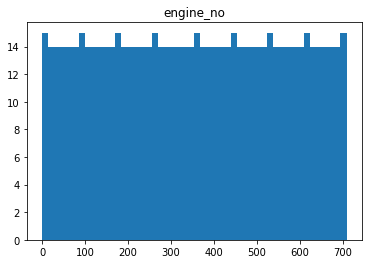

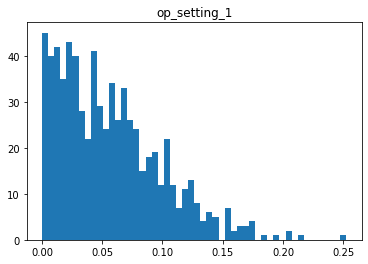

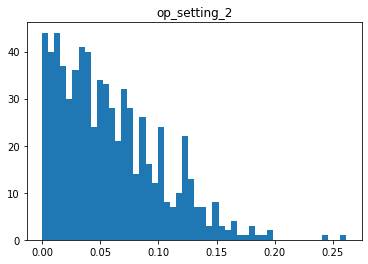

/home/claire/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/claire/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


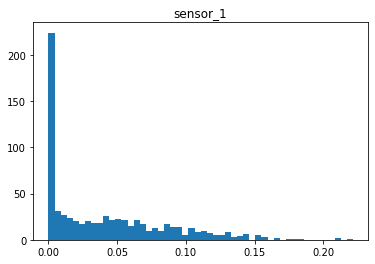

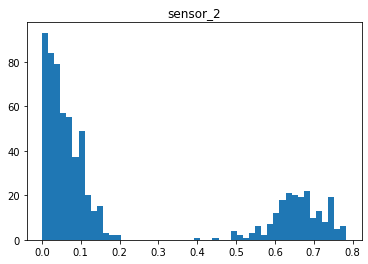

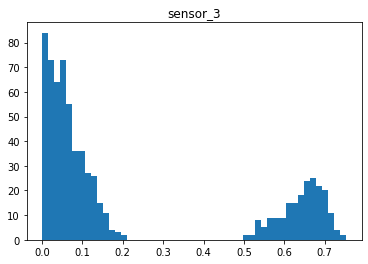

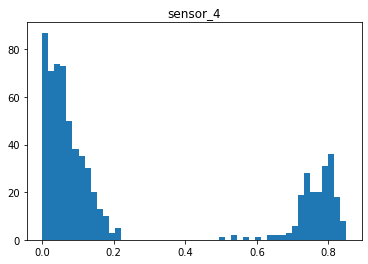

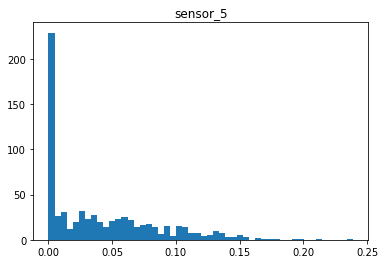

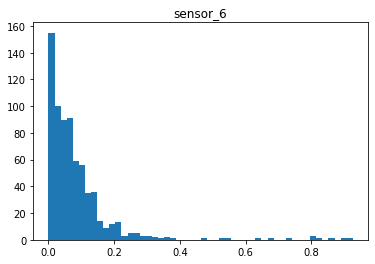

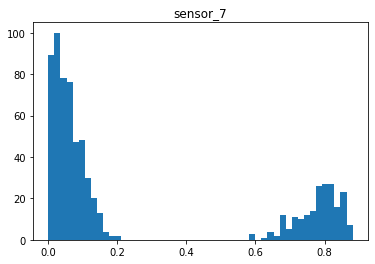

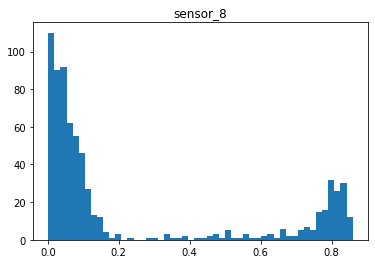

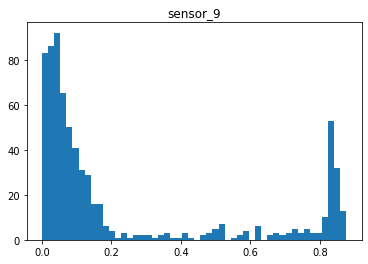

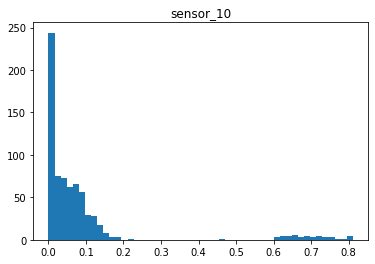

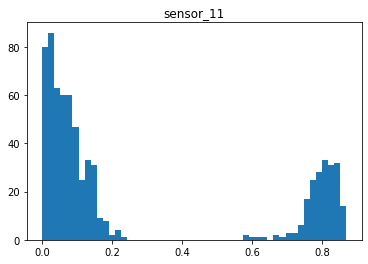

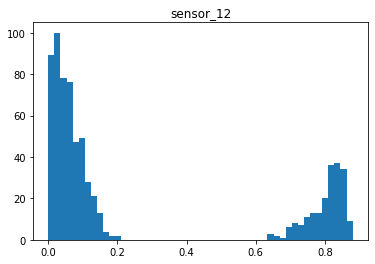

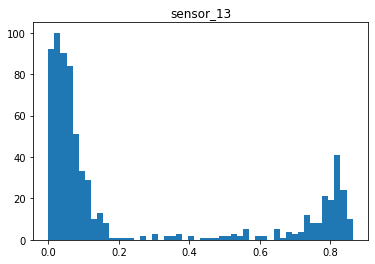

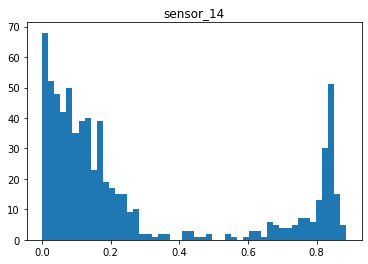

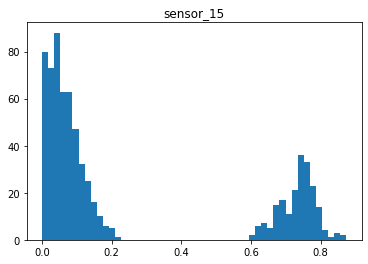

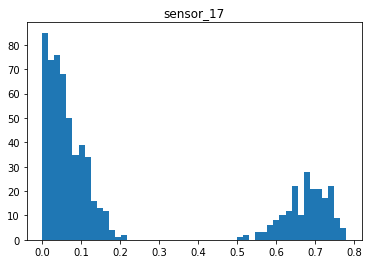

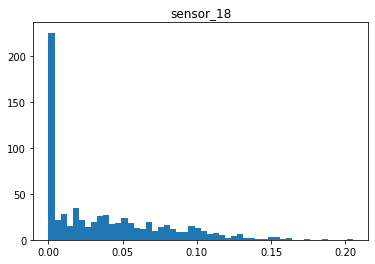

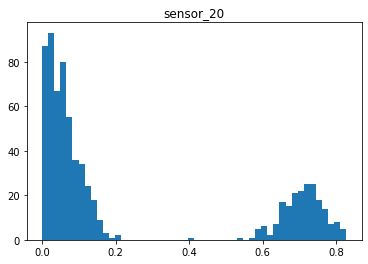

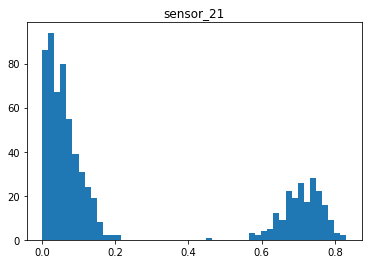

In [45]:
c = 'engine_no', 'op_setting_1', 'op_setting_2', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_18', 'sensor_20', 'sensor_21',
for i in range(22):
    plt.hist(np.abs(l[:, i]), bins=50)
    plt.title(c[i])
    plt.show()

In [46]:
df_cor = pd.DataFrame(l, columns=c)
df_cor=df_cor.dropna()
df_cor

,engine_no,op_setting_1,op_setting_2,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_18,sensor_20,sensor_21
0,0.0,0.045065,0.045413,-0.037769,-0.033152,-0.009067,0.006174,-0.039250,-0.040536,-0.045353,...,-0.059600,0.019554,-0.045082,-0.023713,-0.045274,0.084543,-0.009148,-0.036817,-0.051094,-0.050015
1,1.0,-0.065542,-0.044593,0.047356,0.031300,0.053858,0.066677,0.068089,0.061094,0.065051,...,0.042169,0.052587,0.065118,-0.058919,0.108656,-0.042071,0.053892,-0.028473,0.063887,0.064314
2,2.0,0.049306,0.020897,-0.055194,-0.007445,0.041109,0.052128,-0.061216,-0.050463,-0.036464,...,0.044879,0.101665,-0.035958,0.114200,0.086084,-0.059776,0.034987,0.068507,-0.043458,-0.042947
3,3.0,0.000280,0.028717,0.001933,-0.046329,-0.040723,-0.033731,-0.002022,-0.016682,-0.024586,...,-0.074095,-0.059225,-0.024671,-0.162506,-0.026655,0.095615,-0.044240,-0.133867,-0.023478,-0.023964
4,4.0,0.094081,0.126296,-0.052070,-0.014375,0.018400,0.003685,-0.076529,-0.069308,-0.064052,...,-0.075866,0.061768,-0.063738,0.090641,0.002403,0.022325,0.013486,0.050440,-0.070190,-0.069394
5,5.0,0.032973,-0.107430,0.000000,0.609925,0.607981,0.754799,0.000000,0.043505,-0.731142,...,0.000000,0.794053,-0.746411,0.529428,0.843904,0.671041,0.650489,0.000000,-0.658180,-0.673072
6,6.0,0.042669,0.056504,-0.062669,-0.057292,-0.030899,-0.015138,-0.050584,-0.052560,-0.058411,...,-0.062846,-0.002702,-0.058048,-0.032042,-0.008286,0.091259,-0.029401,-0.053939,-0.060336,-0.060959
7,7.0,-0.053664,0.121093,0.000000,0.608727,0.586368,0.686599,0.000000,0.065352,-0.676571,...,0.000000,0.746718,-0.710308,0.337177,0.835749,0.717440,0.671690,0.000000,-0.675072,-0.647815
8,8.0,0.046310,0.006897,-0.041056,-0.014963,0.017264,0.030270,-0.046519,-0.040874,-0.033123,...,0.016203,0.061762,-0.032839,0.047366,0.014568,-0.008981,0.015341,0.021720,-0.040468,-0.039609
9,9.0,-0.052053,-0.118557,0.000000,0.532707,0.627690,0.730255,0.000000,0.042000,-0.749423,...,0.000000,0.796095,-0.737017,0.654642,0.784790,0.670004,0.651581,0.000000,-0.585615,-0.625828


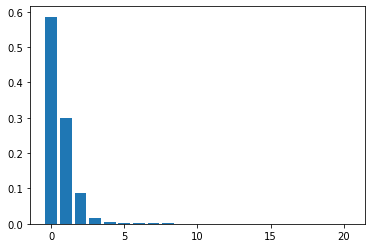

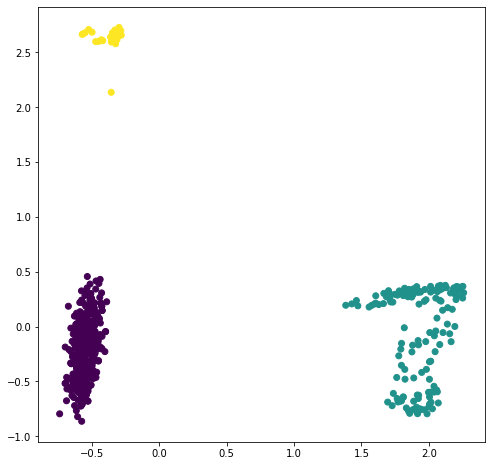

In [47]:
df = df_cor.drop(columns=['engine_no'])
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(df)

pca = PCA()
cor_pca = pca.fit_transform(df)

expl = pca.explained_variance_ratio_
plt.bar(range(len(expl)), expl)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(cor_pca[:,0], cor_pca[:,1], c=y_pred)

In [64]:
df_cor['Failure']=y_pred
fail_type=df_cor[['engine_no', 'Failure']]
dataset = pd.merge(X, fail_type, how='left', on='engine_no')
dataset['GonnaFail'] = (dataset['RUL']<100).astype(int)
dataset = dataset.drop(columns=['RUL'])
dataset.head()

,engine_no,time_in_cycles,op_setting_1,op_setting_2,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_18,sensor_20,sensor_21,Failure,GonnaFail
0,0,1,0.471650,0.570738,-0.765963,-1.424744,-1.781385,-1.591976,-0.666971,-0.838765,...,-1.059968,-2.889927,-2.647883,2.435204,-1.763259,-2.517341,-0.991557,-1.011323,0.0,0
1,0,2,1.076672,1.172198,-1.196595,-0.986876,-0.868334,-0.969966,-1.035035,-0.997053,...,-0.944738,0.346818,-0.196357,0.263382,-0.860657,-0.356136,-0.946224,-0.936969,0.0,0
2,0,3,0.471523,0.574815,-0.765963,-1.434632,-1.701673,-1.568058,-0.666971,-0.837213,...,-1.061551,-2.889747,-2.531168,2.462347,-1.731023,-2.517341,-1.003531,-1.005693,0.0,0
3,0,4,1.500033,1.170567,-1.342550,-1.128830,-0.943646,-1.064904,-1.403100,-1.350875,...,-1.267528,0.346188,0.051214,0.384061,-0.957364,-0.433322,-1.309739,-1.298334,0.0,0
4,0,5,1.076515,1.168664,-1.196595,-0.992290,-0.896936,-1.007530,-1.035035,-0.997053,...,-0.948697,0.346728,-0.133596,0.364502,-0.860657,-0.356136,-0.940237,-0.931966,0.0,0


In [65]:
df_0 = dataset[dataset['Failure']==0].drop(columns=['Failure'])
y_0 = y[dataset['Failure']==0]
df_1 = dataset[dataset['Failure']==1].drop(columns=['Failure'])
y_1 = y[dataset['Failure']==1]
df_2 = dataset[dataset['Failure']==2].drop(columns=['Failure'])
y_2 = y[dataset['Failure']==2]

In [59]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import xgboost as xgb

y_0 = df_0['GonnaFail']
df_0 = df_0.drop(columns=['GonnaFail'])

X_train0, X_test0, y_train0, y_test0 = train_test_split(df_0, y_0, test_size=0.2)

rf0 = RandomForestClassifier(n_estimators=80, criterion='entropy')

rf0.fit(X_train0, y_train0)

y_pred0 = rf0.predict(X_test0)

print("Training score:", rf0.score(X_train0,y_train0))
print("Testing score: ", rf0.score(X_test0, y_test0))
print ("F1 score: " , f1_score(y_test0, y_pred0)) # 1.0


Training score: 0.9999673934308632
Testing score:  0.8796191635509956
F1 score:  0.8609590760733115


In [60]:
y_1 = df_1['GonnaFail']
df_1 = df_1.drop(columns=['GonnaFail'])

X_train1, X_test1, y_train1, y_test1 = train_test_split(df_1, y_1, test_size=0.15)

rf1 = RandomForestClassifier(n_estimators=105, criterion='entropy')

rf1.fit(X_train1,y_train1)
y_pred1=rf1.predict(X_test1)

print("Training score:", rf0.score(X_train1,y_train1))
print("Testing score: ", rf0.score(X_test1,y_test1))
print ("F1 score: " , f1_score(y_test1, y_pred1)) # 1.0

Training score: 0.8713030802869308
Testing score:  0.869376222560313
F1 score:  0.881854658938921


In [66]:

y_2 = df_2['GonnaFail']
df_2 = df_2.drop(columns=['GonnaFail'])

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_2, y_2, test_size=0.2)

rf2 = RandomForestClassifier(n_estimators=80, criterion='entropy')

rf2.fit(X_train2, y_train2)

y_pred2 = rf2.predict(X_test2)

print("Training score:", rf2.score(X_train2,y_train2))
print("Testing score: ", rf2.score(X_test2, y_test2))
print ("F1 score: " , f1_score(y_test2, y_pred2)) # 1.0


Training score: 0.9999024485416057
Testing score:  0.9469371829886851
F1 score:  0.9121447028423774
